## Tensorflow - Simple Harmonic Motion (SHM)   

In [1]:
# Shebang Shiznat Borgersnot
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Using this to circumvent some borked sauces in the tensorflow 1.7.0 version that I'm on in combination with 
# Arch and python 3.6
import logging

class WarningFilter(logging.Filter):
    def filter(self, record):
        msg = record.getMessage()
        tf_warning = 'retry (from tensorflow.contrib.learn.python.learn.datasets.base)' in msg
        return not tf_warning
            
logger = logging.getLogger('tensorflow')
logger.addFilter(WarningFilter())

/home/boost/anaconda3/envs/tensorflow_general/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Helper Function(s)  

In [2]:
def generate_odesolution(function, initial_conditions, t0=0, tfinal=50, n=1000):
    init_state = tf.constant(initial_conditions, dtype=tf.float64)
    t = np.linspace(t0, tfinal, num=n)
    tensor_state, tensor_info = tf.contrib.integrate.odeint(
            function, init_state, t, full_output=True)
    return [tensor_state, tensor_info]

#### Damped SHM  

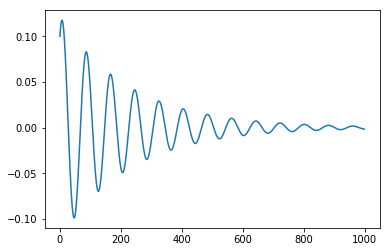

In [3]:
r = 0.035
s = 0.5
m = 0.2
inits = [0.1, 0.1]

def dampedshm_equation(state, t):
    x, y = tf.unstack(state)
    dx = y
    dy = (-r*y - s*x)/m
    return tf.stack([dx, dy])

sess = tf.Session()
state, info = sess.run(generate_odesolution(dampedshm_equation, inits))
x, y = state.T
plt.plot(x)

#### Coupled Damped SHM - Beats  

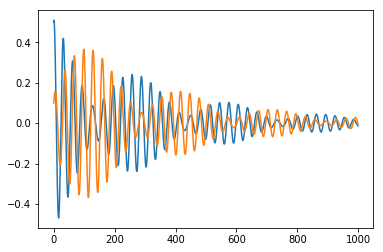

In [4]:
b = 0.007
k1 = 0.27
k2 = 0.027
m = 0.25
inits = [0.5, 0.1, 0.1, 0.1]

def coupledoscillators_equation(state, t):
    x, y, x1, y1 = tf.unstack(state)
    dx = y
    dy = -(k1/m)*x + (k2/m)*x1 - (b/m)*y
    dx1 = y1
    dy1 = (k2/m)*x - (k1/m)*x1 - (b/m)*y1
    return tf.stack([dx, dy, dx1, dy1])

sess = tf.Session()
state, info = sess.run(generate_odesolution(coupledoscillators_equation, inits, tfinal=200))
x, y, x1, y1 = state.T
plt.plot(x)
plt.plot(x1)